Анастасия Плавина

### Тема: Проверка статистических гипотез. P-значения. Доверительные интервалы.

#### Задача 1

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def pdf_plot(from_, to_, loc, scale, title):  
    ox = np.linspace(from_, to_, 1000)
    oy = np.array([stats.norm.pdf(x, loc=loc, scale=scale) for x in ox])
    plt.plot(ox, oy, c='steelblue')
    plt.title(title)
    plt.grid()
    plt.show()


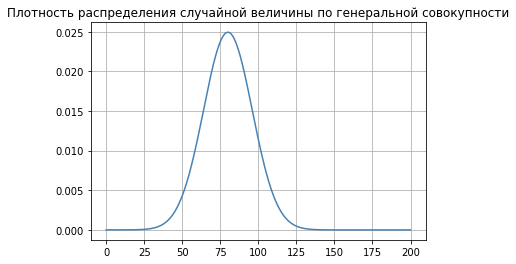

In [2]:
sigma = 16
X = 80
n = 256
alpha = 0.05

pdf_plot(0, 200, X, sigma, 
         'Плотность распределения случайной величины по генеральной совокупности')

1. Выбираем статистику. Т.к. дана генеральная совокупность, и гипотеза выдвигается относительно мат. ожидания, то используем Z-статистику

$$ Z = \frac{\overline X - \mu}{\sigma / \sqrt{n}}$$

2. Фиксируем уровень значимость $\alpha = 0.05$, т.к. необходимо найти  доверительный интервал с надежностью 0.95.

3. Определяем критическую область $\Omega_{\alpha}$

In [3]:
t1 = round(stats.norm.ppf(alpha / 2), 2)
t2 = round(stats.norm.ppf(1 - alpha / 2), 2)

t1, t2

(-1.96, 1.96)

Критическая область:
$$\Omega_{\alpha} = (-\infty, -1.96) \cup (1.96, +\infty)$$

4. Определяем доверительный интервал по формуле:

$P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$
    </div>

In [4]:
def confidential_interval(X, sigma, n, t1, t2):
    left = X + t1 * sigma / n**(1/2)
    right = X + t2 * sigma / n**(1/2)
    return left, right

In [5]:
confidential_interval(X, sigma, n, t1, t2)

(78.04, 81.96)

Итак, мат. ожидание $\mu$ генеральной совокупности с 95%-тной вероятностью находится в интервале  от 78.04 до 81.96.

#### Задача 2

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

In [6]:
samples = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]
n = 10 
mu = 200 
X = np.mean(samples)
sigma = np.std(samples)
alpha = 0.01

X, sigma

(198.5, 4.224926034855522)

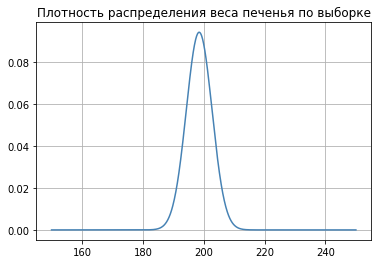

In [7]:
pdf_plot(150, 250, X, sigma, 
         'Плотность распределения веса печенья по выборке')

1. Нулевая гипотеза: средний вес пачки печенья = 200 г. Альтернативная гипотеза: средний вес пачки печенья не равен 200 г.

2. Т.к. гипотеза выдвигается о мат. ожидании на основе выборки, то используем t-статистику.

$$ t = \frac{\overline X - \mu}{\sigma_X / \sqrt{n}}$$

In [8]:
def t_test(X, mu, sigma, n):
    return (X - mu) / (sigma / n**(1/2))

3. Фиксируем уровень значимость $\alpha = 0.01$

4. Определяем критическую область $\Omega_{\alpha}$

In [9]:
t1 = stats.t.ppf(alpha / 2, df = n-1)
t2 = stats.t.ppf(1 - alpha / 2, df = n-1)

t1, t2

(-3.24983554401537, 3.2498355440153697)

Критическая область:
$$\Omega_{\alpha} = (-\infty, -3.25) \cup (3.25, +\infty)$$

5. Проводим статистический тест

In [10]:
t_test(X, mu, sigma, n)

-1.1227217828476797

6. Оценка. Значение статистики не попадает в критическую область => нулевая гипотеза не отвергается.

7. Найдем P-value для данного теста

In [11]:
t = t_test(X, mu, sigma, n)

def pvalue(t, n):
    p_left = stats.t.cdf(t, df = n - 1)
    p_right = 1 - stats.t.cdf(t, df = n - 1)
    return round(2 * min(p_left, p_right), 2)

pvalue(t, n)

0.29

In [12]:
t = t_test(X, mu, sigma, n)
alphas = np.arange(0.01, 0.51, 0.01)

print('alpha\t H_0')
print('------------')

for alpha in alphas:
    t1 = stats.t.ppf(alpha / 2, df = n-1)
    t2 = stats.t.ppf(1 - alpha / 2, df = n-1)
    
    print(round(alpha,2), '\t', t1 <= t <= t2)

alpha	 H_0
------------
0.01 	 True
0.02 	 True
0.03 	 True
0.04 	 True
0.05 	 True
0.06 	 True
0.07 	 True
0.08 	 True
0.09 	 True
0.1 	 True
0.11 	 True
0.12 	 True
0.13 	 True
0.14 	 True
0.15 	 True
0.16 	 True
0.17 	 True
0.18 	 True
0.19 	 True
0.2 	 True
0.21 	 True
0.22 	 True
0.23 	 True
0.24 	 True
0.25 	 True
0.26 	 True
0.27 	 True
0.28 	 True
0.29 	 True
0.3 	 False
0.31 	 False
0.32 	 False
0.33 	 False
0.34 	 False
0.35 	 False
0.36 	 False
0.37 	 False
0.38 	 False
0.39 	 False
0.4 	 False
0.41 	 False
0.42 	 False
0.43 	 False
0.44 	 False
0.45 	 False
0.46 	 False
0.47 	 False
0.48 	 False
0.49 	 False
0.5 	 False


Переходное значение $\alpha=0.29$, т.е. $0.29$ можно принять в качестве p-value.

#### Задача 3

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

In [13]:
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 
           1.1134, 1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 
           1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 
           1.0232, 1.0865, 1.02 ]

In [14]:
n = len(samples)
Dx = np.var(samples, ddof = 1)
D = 0.0625
alpha = 0.05

n, Dx

(24, 0.07804495041666669)

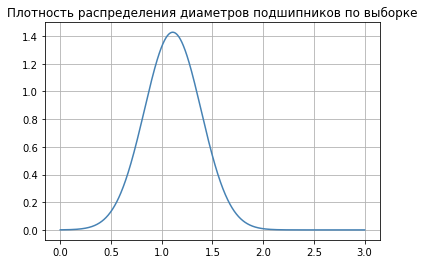

In [15]:
sigma = np.std(samples, ddof = 1)
X = np.mean(samples)

pdf_plot(0, 3, X, sigma, 
         'Плотность распределения диаметров подшипников по выборке')

1. Нулевая гипотеза: дисперсия величины подшипника = 0.0625. Альтернативная гипотеза: дисперсия величины подшипника отлична от 0.0625

2. Для проверки гипотезы выбираем Хи-квадрат тест, т.к. гипотеза о дисперсии. 

$$ H = (n - 1) \cdot D_X / D$$

In [16]:
def chi_2(n, Dx, D):
    return (n - 1) * Dx / D

3. Устанавливаем уровень значимости $\alpha = 0.05$

4. Определяем критическую область:

In [17]:
t1 = round(stats.chi2.ppf(alpha/2, df = n-1), 2)
t2 = round(stats.chi2.ppf(1 - alpha/2, df = n-1), 2)

t1, t2

(11.69, 38.08)

Критическая область:
$$\Omega_{\alpha} = (-\infty, 11.69) \cup (38.08, +\infty)$$

In [18]:
chi_2(n, Dx, D)

28.720541753333343

5. Оценка. Статистика не попадает в критическую область => нулевая гипотеза не отвергается.